# 07. Population

[1. 배경](#배경) <br>
[2. 데이터 읽고 인구 소멸 지역 계산](#데이터-읽기) <br>
&emsp;    - [컬럼 이름 변경 및 불필요한 행 제거](#컬럼-이름-변경)<br>
&emsp;    - [소멸 지역을 조사하기 위한 데이터 - 20-39세, 65세이상 컬럼 생성](#컬럼-생성)<br>
&emsp;    - [pivot_table](#pivot-table)<br>
&emsp;    - [소멸 비율 계산](#소멸-비율-계산)<br>
&emsp;    - [소멸 위기 지역 여부 컬럼 생성](#소멸-위기-지역-여부)<br>
[3. 지도 시각화를 위한 지역별 ID 만들기](#지도-id-생성) <br>
[4. 카르토그램으로 인구현황 시각화](#카르토그램) <br>
&emsp;    - [엑셀로 그린 지도 모양](#엑셀로-그린-지도-모양)<br>
&emsp;    - [엑셀에서의 각 지역별 좌표 조회](#지역별-좌표-조회)<br>
&emsp;    - [지역별 경계선 그리기](#지역별-경계선-그리기)<br>
&emsp;    - [엑셀에서 얻은 지도 좌표 + 인구 현황 데이터](#merge)<br>
&emsp;    - [그림을 그리기 위한 데이터를 계산](#데이터-계산)<br>
&emsp;    - [인구수 합계 카르토그램](#카르토그램1)<br>
&emsp;    - [소멸위기지역 카르토그램](#카르토그램2)<br>
&emsp;    - [여성비 카르토그램](#카르토그램3)<br>
&emsp;    - [2030여성비 카르토그램](#카르토그램4)<br>
[5. Folium으로 인구현황 시각화](#folium) <br>
&emsp;    - [인구수합계 지도 시각화](#인구수-합계-지도-시각화)<br>
&emsp;    - [소멸위기지역 지도 시각화](#소멸위기지역-지도-시각화)<br>
[6. 데이터 저장](#데이터-저장) <br>
[사용 함수 예제](#사용-함수-예제) <br>
&emsp;    - [fillna()](#fill-na)<br>

[Github에서는 toc가 작동안함. nbviewer로 보기👀](https://nbviewer.org/github/solpinetree/ds_study/blob/main/source_code/07.%20Population.ipynb)

<a id="배경"></a>
## 1. 배경

> **소멸위험지수**
20-39세 여성 인구 수를 65세 이상 인구수로 나눈 값<br>
젊은 여성 인구가 노인 인구의 절반에 미달할 경우 '소멸 위험 지역'으로 분류하는 방식<br>
    - 1.5 이상 : 소멸 저위험<br>
    - 1.0 ~ 1.5 : 보통<br>
    - 0.5 ~ 1.0 : 주의<br>
    - 0.2 ~ 0.5 : 소멸 위험<br>
    - 0.2 미만 : 소멸 고위험 지역<br>

목표 
- 1. 인구 소멸 위기 지역 파악
- 2. 인구 소멸 위기 지역의 위도 표현
- 3. 지도 표현에 대한 카르토그램 표현

---

<a id="데이터-읽기"></a>
## 2. 데이터 읽고 인구 소멸 지역 계산

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import set_matplotlib_hangul
import warnings

warnings.filterwarnings(action="ignore") # 경고 문구 무시
%matplotlib inline

In [155]:
population = pd.read_csv(
    "../data/07. population_raw_data.csv", 
    encoding="utf-8",
    header=1
)
population.fillna(method="pad", inplace=True)
population.head()

,행정구역(동읍면)별(1),행정구역(동읍면)별(2),행정구역(동읍면)별(3),항목,계,20 - 24세,25 - 29세,30 - 34세,35 - 39세,40 - 44세,...,55 - 59세,60 - 64세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
0,전국,소계,소계,총인구수 (명),51265238,2711038,3343400,3454825,3144285,3968671,...,4260354,4216718,3526690,2332941,1751817,1340443,746668,259885,57336,8688
1,전국,소계,소계,남자인구수 (명),25528507,1408133,1748364,1817952,1622003,2021792,...,2138774,2096981,1716169,1096071,783469,526625,242361,62946,10567,1568
2,전국,소계,소계,여자인구수 (명),25736731,1302905,1595036,1636873,1522282,1946879,...,2121580,2119737,1810521,1236870,968348,813818,504307,196939,46769,7120
3,서울특별시,소계,소계,총인구수 (명),9360400,543819,788133,790442,644805,722803,...,709798,700953,622332,427050,330610,233241,116634,38549,9209,1505
4,서울특별시,소계,소계,남자인구수 (명),4521316,253919,374777,396396,321523,358815,...,347271,336023,290356,195609,146867,99161,42729,10796,2072,351


In [156]:
population.columns

Index(['행정구역(동읍면)별(1)', '행정구역(동읍면)별(2)', '행정구역(동읍면)별(3)', '항목', '계',
       '20 - 24세', '25 - 29세', '30 - 34세', '35 - 39세', '40 - 44세', '45 - 49세',
       '50 - 54세', '55 - 59세', '60 - 64세', '65 - 69세', '70 - 74세', '75 - 79세',
       '80 - 84세', '85 - 89세', '90 - 94세', '95 - 99세', '100+'],
      dtype='object')

<a id="컬럼-이름-변경"></a>
### 컬럼 이름 변경 및 불필요한 행 제거

In [157]:
population.rename(
    columns={"행정구역(동읍면)별(1)": "광역시도", "계" : "인구수", "행정구역(동읍면)별(2)": "시도", "행정구역(동읍면)별(3)": "행정구"},
    inplace=True
)
population.head()

,광역시도,시도,행정구,항목,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,40 - 44세,...,55 - 59세,60 - 64세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
0,전국,소계,소계,총인구수 (명),51265238,2711038,3343400,3454825,3144285,3968671,...,4260354,4216718,3526690,2332941,1751817,1340443,746668,259885,57336,8688
1,전국,소계,소계,남자인구수 (명),25528507,1408133,1748364,1817952,1622003,2021792,...,2138774,2096981,1716169,1096071,783469,526625,242361,62946,10567,1568
2,전국,소계,소계,여자인구수 (명),25736731,1302905,1595036,1636873,1522282,1946879,...,2121580,2119737,1810521,1236870,968348,813818,504307,196939,46769,7120
3,서울특별시,소계,소계,총인구수 (명),9360400,543819,788133,790442,644805,722803,...,709798,700953,622332,427050,330610,233241,116634,38549,9209,1505
4,서울특별시,소계,소계,남자인구수 (명),4521316,253919,374777,396396,321523,358815,...,347271,336023,290356,195609,146867,99161,42729,10796,2072,351


In [158]:
population = population[(population["시도"] != "소계")]
population.head()

,광역시도,시도,행정구,항목,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,40 - 44세,...,55 - 59세,60 - 64세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
6,서울특별시,종로구,소계,총인구수 (명),139093,8985,12386,11225,8374,9635,...,11482,11361,9599,6329,5380,4346,2408,825,220,44
7,서울특별시,종로구,소계,남자인구수 (명),66956,4056,5979,5656,4073,4721,...,5628,5738,4759,3005,2348,1788,913,279,57,14
8,서울특별시,종로구,소계,여자인구수 (명),72137,4929,6407,5569,4301,4914,...,5854,5623,4840,3324,3032,2558,1495,546,163,30
9,서울특별시,중구,소계,총인구수 (명),121407,6534,10613,11921,9464,9071,...,9458,9641,8793,5888,4790,3765,1950,724,188,24
10,서울특별시,중구,소계,남자인구수 (명),58546,2930,4797,5886,4749,4579,...,4800,4858,4300,2793,2060,1524,644,185,46,8


In [159]:
population.rename(columns={"항목":"구분"}, inplace=True)

population.loc[population["구분"] == "총인구수 (명)", "구분"] = "합계"
population.loc[population["구분"] == "남자인구수 (명)", "구분"] = "남자"
population.loc[population["구분"] == "여자인구수 (명)", "구분"] = "여자"

population.head()

,광역시도,시도,행정구,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,40 - 44세,...,55 - 59세,60 - 64세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
6,서울특별시,종로구,소계,합계,139093,8985,12386,11225,8374,9635,...,11482,11361,9599,6329,5380,4346,2408,825,220,44
7,서울특별시,종로구,소계,남자,66956,4056,5979,5656,4073,4721,...,5628,5738,4759,3005,2348,1788,913,279,57,14
8,서울특별시,종로구,소계,여자,72137,4929,6407,5569,4301,4914,...,5854,5623,4840,3324,3032,2558,1495,546,163,30
9,서울특별시,중구,소계,합계,121407,6534,10613,11921,9464,9071,...,9458,9641,8793,5888,4790,3765,1950,724,188,24
10,서울특별시,중구,소계,남자,58546,2930,4797,5886,4749,4579,...,4800,4858,4300,2793,2060,1524,644,185,46,8


<a id="컬럼-생성"></a>
### 소멸 지역을 조사하기 위한 데이터 - 20-39세, 65세이상 컬럼 생성

In [160]:
population["20-39세"] = (
    population["20 - 24세"] 
    + population["25 - 29세"]
    + population["30 - 34세"]
    + population["35 - 39세"]
)

population["65세이상"] = (
    population["65 - 69세"]
    + population["70 - 74세"]
    + population["75 - 79세"]
    + population["80 - 84세"]
    + population["85 - 89세"]
    + population["90 - 94세"]
    + population["95 - 99세"]
    + population["100+"]
)

population.head()

,광역시도,시도,행정구,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,40 - 44세,...,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+,20-39세,65세이상
6,서울특별시,종로구,소계,합계,139093,8985,12386,11225,8374,9635,...,9599,6329,5380,4346,2408,825,220,44,40970,29151
7,서울특별시,종로구,소계,남자,66956,4056,5979,5656,4073,4721,...,4759,3005,2348,1788,913,279,57,14,19764,13163
8,서울특별시,종로구,소계,여자,72137,4929,6407,5569,4301,4914,...,4840,3324,3032,2558,1495,546,163,30,21206,15988
9,서울특별시,중구,소계,합계,121407,6534,10613,11921,9464,9071,...,8793,5888,4790,3765,1950,724,188,24,38532,26122
10,서울특별시,중구,소계,남자,58546,2930,4797,5886,4749,4579,...,4300,2793,2060,1524,644,185,46,8,18362,11560


<a id="pivot-table"></a>
### pivot_table

In [161]:
pop = pd.pivot_table(
    population,
    index=["광역시도", "시도", "행정구"], 
    columns=["구분"],
    values=["인구수", "20-39세", "65세이상"]
)

pop

20-39세                  65세이상                    인구수          \
구분                   남자      여자      합계     남자     여자      합계      남자      여자   
광역시도    시도  행정구                                                                 
강원특별자치도 강릉시 소계    22901   19250   42151  23028  30168   53196  103188  105063   
        고성군 소계     2823    1956    4779   3934   5028    8962   13909   13234   
        동해시 소계     9335    7056   16391   9407  12016   21423   44555   43297   
        삼척시 소계     6352    4991   11343   8041  10378   18419   31726   30604   
        속초시 소계     9224    7344   16568   8294  10757   19051   40216   41208   
...                 ...     ...     ...    ...    ...     ...     ...     ...   
충청북도    청주시 서원구   24933   21029   45962  15442  19733   35175   91321   92055   
            소계   123802  104519  228321  61307  77676  138983  431274  422289   
            청원구   28360   22543   50903  13146  16817   29963   97617   91756   
            흥덕구   45769   38762   84531  16692  20804   37496  143608  138355   
        충주시 소계    24764   18931   43695  21946  27471   49417  105235  102111   

                         
구분                   합계  
광역시도    시도  행정구          
강원특별자치도 강릉시 소계   208251  
        고성군 소계    27143  
        동해시 소계    87852  
        삼척시 소계    62330  
        속초시 소계    81424  
...                 ...  
충청북도    청주시 서원구  183376  
            소계   853563  
            청원구  189373  
            흥덕구  281963  
        충주시 소계   207346  

[264 rows x 9 columns]

<a id="소멸-비율-계산"></a>
### 소멸 비율 계산
- 젊은 여성 인구가 노인 인구의 절반에 미달할 경우 '소멸 위험 지역'으로 분류하는 방식 에서 착안한 계산법

In [162]:
pop["소멸비율"] = pop["20-39세", "여자"] / (pop["65세이상", "합계"] / 2)
pop.head()

20-39세                65세이상                   인구수          \
구분                  남자     여자     합계     남자     여자     합계      남자      여자   
광역시도    시도  행정구                                                             
강원특별자치도 강릉시 소계   22901  19250  42151  23028  30168  53196  103188  105063   
        고성군 소계    2823   1956   4779   3934   5028   8962   13909   13234   
        동해시 소계    9335   7056  16391   9407  12016  21423   44555   43297   
        삼척시 소계    6352   4991  11343   8041  10378  18419   31726   30604   
        속초시 소계    9224   7344  16568   8294  10757  19051   40216   41208   

                             소멸비율  
구분                   합계            
광역시도    시도  행정구                    
강원특별자치도 강릉시 소계   208251  0.723739  
        고성군 소계    27143  0.436510  
        동해시 소계    87852  0.658731  
        삼척시 소계    62330  0.541940  
        속초시 소계    81424  0.770983

<a id="소멸-위기-지역-여부"></a>
### 소멸 위기 지역 여부 컬럼 생성

In [163]:
pop["소멸위기지역"] = pop["소멸비율"] < 1.0
pop.head()

20-39세                65세이상                   인구수          \
구분                  남자     여자     합계     남자     여자     합계      남자      여자   
광역시도    시도  행정구                                                             
강원특별자치도 강릉시 소계   22901  19250  42151  23028  30168  53196  103188  105063   
        고성군 소계    2823   1956   4779   3934   5028   8962   13909   13234   
        동해시 소계    9335   7056  16391   9407  12016  21423   44555   43297   
        삼척시 소계    6352   4991  11343   8041  10378  18419   31726   30604   
        속초시 소계    9224   7344  16568   8294  10757  19051   40216   41208   

                             소멸비율 소멸위기지역  
구분                   합계                   
광역시도    시도  행정구                           
강원특별자치도 강릉시 소계   208251  0.723739   True  
        고성군 소계    27143  0.436510   True  
        동해시 소계    87852  0.658731   True  
        삼척시 소계    62330  0.541940   True  
        속초시 소계    81424  0.770983   True

In [164]:
len(pop)

264

In [165]:
# 소멸위기지역 조회

pop[pop["소멸위기지역"]==True].index.get_level_values(1)

Index(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '인제군', '정선군',
       ...
       '홍성군', '괴산군', '단양군', '보은군', '영동군', '옥천군', '음성군', '제천시', '증평군', '충주시'],
      dtype='object', name='시도', length=136)

In [166]:
pop.reset_index(inplace=True)
pop.head()

광역시도   시도 행정구 20-39세                65세이상                   인구수  \
구분                       남자     여자     합계     남자     여자     합계      남자   
0   강원특별자치도  강릉시  소계  22901  19250  42151  23028  30168  53196  103188   
1   강원특별자치도  고성군  소계   2823   1956   4779   3934   5028   8962   13909   
2   강원특별자치도  동해시  소계   9335   7056  16391   9407  12016  21423   44555   
3   강원특별자치도  삼척시  소계   6352   4991  11343   8041  10378  18419   31726   
4   강원특별자치도  속초시  소계   9224   7344  16568   8294  10757  19051   40216   

                        소멸비율 소멸위기지역  
구분      여자      합계                   
0   105063  208251  0.723739   True  
1    13234   27143  0.436510   True  
2    43297   87852  0.658731   True  
3    30604   62330  0.541940   True  
4    41208   81424  0.770983   True

In [167]:
pop.columns.get_level_values(0)

Index(['광역시도', '시도', '행정구', '20-39세', '20-39세', '20-39세', '65세이상', '65세이상',
       '65세이상', '인구수', '인구수', '인구수', '소멸비율', '소멸위기지역'],
      dtype='object')

In [168]:
tmp_columns=[
    pop.columns.get_level_values(0)[n] + pop.columns.get_level_values(1)[n]
    for n in range(0, len(pop.columns.get_level_values(0)))
]
pop.columns = tmp_columns
pop.head()

,광역시도,시도,행정구,20-39세남자,20-39세여자,20-39세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
0,강원특별자치도,강릉시,소계,22901,19250,42151,23028,30168,53196,103188,105063,208251,0.723739,True
1,강원특별자치도,고성군,소계,2823,1956,4779,3934,5028,8962,13909,13234,27143,0.436510,True
2,강원특별자치도,동해시,소계,9335,7056,16391,9407,12016,21423,44555,43297,87852,0.658731,True
3,강원특별자치도,삼척시,소계,6352,4991,11343,8041,10378,18419,31726,30604,62330,0.541940,True
4,강원특별자치도,속초시,소계,9224,7344,16568,8294,10757,19051,40216,41208,81424,0.770983,True


---

<a id="지도-id-생성"></a>
## 3. 지도 시각화를 위한 지역별 ID 만들기
- folium에서 사용하려면 지역마다 고유한 아이디 역할을 하는 것이 필요함. 사용하고자 하는 json에서의 id 값을 각 행에 매칭해준다.

In [169]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   광역시도      264 non-null    object 
 1   시도        264 non-null    object 
 2   행정구       264 non-null    object 
 3   20-39세남자  264 non-null    int64  
 4   20-39세여자  264 non-null    int64  
 5   20-39세합계  264 non-null    int64  
 6   65세이상남자   264 non-null    int64  
 7   65세이상여자   264 non-null    int64  
 8   65세이상합계   264 non-null    int64  
 9   인구수남자     264 non-null    int64  
 10  인구수여자     264 non-null    int64  
 11  인구수합계     264 non-null    int64  
 12  소멸비율      264 non-null    float64
 13  소멸위기지역    264 non-null    bool   
dtypes: bool(1), float64(1), int64(9), object(3)
memory usage: 27.2+ KB


In [170]:
pop["광역시도"].unique()

array(['강원특별자치도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시',
       '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전북특별자치도',
       '제주특별자치도', '충청남도', '충청북도'], dtype=object)

In [171]:
pop["시도"].unique()

array(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시',
       '인제군', '정선군', '철원군', '춘천시', '태백시', '평창군', '홍천군', '화천군', '횡성군',
       '가평군', '고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '김포시', '남양주시',
       '동두천시', '부천시', '성남시', '수원시', '시흥시', '안산시', '안성시', '안양시', '양주시',
       '양평군', '여주시', '연천군', '오산시', '용인시', '의왕시', '의정부시', '이천시', '파주시',
       '평택시', '포천시', '하남시', '화성시', '거제시', '거창군', '김해시', '남해군', '밀양시',
       '사천시', '산청군', '양산시', '의령군', '진주시', '창녕군', '창원시', '통영시', '하동군',
       '함안군', '함양군', '합천군', '경산시', '경주시', '고령군', '구미시', '김천시', '문경시',
       '봉화군', '상주시', '성주군', '안동시', '영덕군', '영양군', '영주시', '영천시', '예천군',
       '울릉군', '울진군', '의성군', '청도군', '청송군', '칠곡군', '포항시', '광산구', '남구', '동구',
       '북구', '서구', '군위군', '달서구', '달성군', '수성구', '중구', '대덕구', '유성구', '강서구',
       '금정구', '기장군', '동래구', '부산진구', '사상구', '사하구', '수영구', '연제구', '영도구',
       '해운대구', '강남구', '강동구', '강북구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
    

In [172]:
pop["행정구"].unique()

array(['소계', '덕양구', '일산동구', '일산서구', '소사구', '오정구', '원미구', '분당구', '수정구',
       '중원구', '권선구', '영통구', '장안구', '팔달구', '단원구', '상록구', '동안구', '만안구',
       '기흥구', '수지구', '처인구', '마산합포구', '마산회원구', '성산구', '의창구', '진해구', '남구',
       '북구', '덕진구', '완산구', '동남구', '서북구', '상당구', '서원구', '청원구', '흥덕구'],
      dtype=object)

#### 행정구의 데이터가 있는 "시도"의 "소계" 행은 제거

In [173]:
tmp_gu = np.delete(pop["행정구"].unique(), 0) 

In [174]:
tmp_gu = list(tmp_gu)
tmp_gu

['덕양구',
 '일산동구',
 '일산서구',
 '소사구',
 '오정구',
 '원미구',
 '분당구',
 '수정구',
 '중원구',
 '권선구',
 '영통구',
 '장안구',
 '팔달구',
 '단원구',
 '상록구',
 '동안구',
 '만안구',
 '기흥구',
 '수지구',
 '처인구',
 '마산합포구',
 '마산회원구',
 '성산구',
 '의창구',
 '진해구',
 '남구',
 '북구',
 '덕진구',
 '완산구',
 '동남구',
 '서북구',
 '상당구',
 '서원구',
 '청원구',
 '흥덕구']

In [175]:
pop[pop["행정구"].isin(tmp_gu)]["시도"].unique()

array(['고양시', '부천시', '성남시', '수원시', '안산시', '안양시', '용인시', '창원시', '포항시',
       '전주시', '천안시', '청주시'], dtype=object)

In [176]:
pop[(pop["시도"].isin(pop[pop["행정구"].isin(tmp_gu)]["시도"].unique())) & (pop["행정구"] == "소계")]

,광역시도,시도,행정구,20-39세남자,20-39세여자,20-39세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
20,경기도,고양시,소계,138033,136822,274855,79159,100341,179500,522495,549307,1071802,1.524479,False
31,경기도,부천시,소계,103406,97375,200781,63241,76727,139968,382151,391538,773689,1.391389,False
36,경기도,성남시,소계,127667,120983,248650,71124,86562,157686,453606,463009,916615,1.534480,False
40,경기도,수원시,소계,188957,170240,359197,72732,90940,163672,601857,594814,1196671,2.080258,False
47,경기도,안산시,소계,93768,79696,173464,41729,49642,91371,320093,304695,624788,1.744448,False
51,경기도,안양시,소계,75893,70975,146868,42358,51493,93851,270324,277681,548005,1.512504,False
58,경기도,용인시,소계,137090,129437,266527,76395,95022,171417,537346,546110,1083456,1.510200,False
84,경상남도,창원시,소계,125340,102160,227500,84383,102545,186928,507814,495362,1003176,1.093041,False
115,경상북도,포항시,소계,58203,44512,102715,48756,58910,107666,250169,242266,492435,0.826853,True
226,전북특별자치도,전주시,소계,82816,76651,159467,49678,64965,114643,313679,325285,638964,1.337212,False


In [177]:
rows_to_remove = pop[(pop["시도"].isin(pop[pop["행정구"].isin(tmp_gu)]["시도"].unique())) & (pop["행정구"] == "소계")]
pop = pop.drop(rows_to_remove.index)
pop.head()

,광역시도,시도,행정구,20-39세남자,20-39세여자,20-39세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
0,강원특별자치도,강릉시,소계,22901,19250,42151,23028,30168,53196,103188,105063,208251,0.723739,True
1,강원특별자치도,고성군,소계,2823,1956,4779,3934,5028,8962,13909,13234,27143,0.436510,True
2,강원특별자치도,동해시,소계,9335,7056,16391,9407,12016,21423,44555,43297,87852,0.658731,True
3,강원특별자치도,삼척시,소계,6352,4991,11343,8041,10378,18419,31726,30604,62330,0.541940,True
4,강원특별자치도,속초시,소계,9224,7344,16568,8294,10757,19051,40216,41208,81424,0.770983,True


In [178]:
pop.reset_index(drop=True, inplace=True)
pop.tail()

,광역시도,시도,행정구,20-39세남자,20-39세여자,20-39세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
247,충청북도,청주시,상당구,24740,22185,46925,16027,20322,36349,98728,100123,198851,1.220666,False
248,충청북도,청주시,서원구,24933,21029,45962,15442,19733,35175,91321,92055,183376,1.195679,False
249,충청북도,청주시,청원구,28360,22543,50903,13146,16817,29963,97617,91756,189373,1.504722,False
250,충청북도,청주시,흥덕구,45769,38762,84531,16692,20804,37496,143608,138355,281963,2.067527,False
251,충청북도,충주시,소계,24764,18931,43695,21946,27471,49417,105235,102111,207346,0.766174,True


In [179]:
pop[pop["시도"] == "고성군"]

,광역시도,시도,행정구,20-39세남자,20-39세여자,20-39세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
1,강원특별자치도,고성군,소계,2823,1956,4779,3934,5028,8962,13909,13234,27143,0.436510,True
64,경상남도,고성군,소계,3371,2416,5787,7638,10059,17697,24629,23968,48597,0.273041,True


- 일반 시의 이름 정리
- 세종시의 이름 정리
- 광역시도, 특별시, 특별자치도의 시구를 정리

In [180]:
si_name = ['' for i in range(0, len(pop))]

for idx, row in pop.iterrows():
    
    # 행정구가 있을 경우 "시도 행정구" 로 ID를 설정
    if row["행정구"] != "소계":
        if row["행정구"] in ["마산합포구", "마산회원구"]:
            si_name[idx] = row["시도"][:2] + " " + row["행정구"][2:-1]
        elif len(row["행정구"]) == 2:
            si_name[idx] = row["시도"][:2] + " " + row["행정구"]
        else:
            si_name[idx] = row["시도"][:2] + " " + row["행정구"][:-1]
    
    elif row["시도"] == "고성군":
        if row["광역시도"] == "강원특별자치도":
            si_name[idx] = "고성(강원)"
        else:
            si_name[idx] = "고성(경남)"
    
    # 강릉시 -> 강릉, 춘천시 -> 춘천
    elif row["광역시도"][-3:] not in ["광역시", "특별시", "자치시"]:
        si_name[idx] = row["시도"][:-1]
        
    elif row["광역시도"] == "세종특별자치시":
        si_name[idx] = "세종"
        
    # 중구 -> 인천 중구
    # 강남구 -> 서울 강남
    else:
        if len(row["시도"]) == 2:
            si_name[idx] = row["광역시도"][:2] + " " + row["시도"]
        else:
            si_name[idx] = row["광역시도"][:2] + " " + row["시도"][:-1]


In [181]:
si_name

['강릉',
 '고성(강원)',
 '동해',
 '삼척',
 '속초',
 '양구',
 '양양',
 '영월',
 '원주',
 '인제',
 '정선',
 '철원',
 '춘천',
 '태백',
 '평창',
 '홍천',
 '화천',
 '횡성',
 '가평',
 '고양 덕양',
 '고양 일산동',
 '고양 일산서',
 '과천',
 '광명',
 '광주',
 '구리',
 '군포',
 '김포',
 '남양주',
 '동두천',
 '부천 소사',
 '부천 오정',
 '부천 원미',
 '성남 분당',
 '성남 수정',
 '성남 중원',
 '수원 권선',
 '수원 영통',
 '수원 장안',
 '수원 팔달',
 '시흥',
 '안산 단원',
 '안산 상록',
 '안성',
 '안양 동안',
 '안양 만안',
 '양주',
 '양평',
 '여주',
 '연천',
 '오산',
 '용인 기흥',
 '용인 수지',
 '용인 처인',
 '의왕',
 '의정부',
 '이천',
 '파주',
 '평택',
 '포천',
 '하남',
 '화성',
 '거제',
 '거창',
 '고성(경남)',
 '김해',
 '남해',
 '밀양',
 '사천',
 '산청',
 '양산',
 '의령',
 '진주',
 '창녕',
 '창원 합포',
 '창원 회원',
 '창원 성산',
 '창원 의창',
 '창원 진해',
 '통영',
 '하동',
 '함안',
 '함양',
 '합천',
 '경산',
 '경주',
 '고령',
 '구미',
 '김천',
 '문경',
 '봉화',
 '상주',
 '성주',
 '안동',
 '영덕',
 '영양',
 '영주',
 '영천',
 '예천',
 '울릉',
 '울진',
 '의성',
 '청도',
 '청송',
 '칠곡',
 '포항 남구',
 '포항 북구',
 '광주 광산',
 '광주 남구',
 '광주 동구',
 '광주 북구',
 '광주 서구',
 '대구 군위',
 '대구 남구',
 '대구 달서',
 '대구 달성',
 '대구 동구',
 '대구 북구',
 '대구 서구',
 '대구 수성',
 '대구 중구',
 '대전 대덕',
 '대전 동구

In [182]:
pop["ID"] = si_name

In [183]:
pop.head()

,광역시도,시도,행정구,20-39세남자,20-39세여자,20-39세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID
0,강원특별자치도,강릉시,소계,22901,19250,42151,23028,30168,53196,103188,105063,208251,0.723739,True,강릉
1,강원특별자치도,고성군,소계,2823,1956,4779,3934,5028,8962,13909,13234,27143,0.436510,True,고성(강원)
2,강원특별자치도,동해시,소계,9335,7056,16391,9407,12016,21423,44555,43297,87852,0.658731,True,동해
3,강원특별자치도,삼척시,소계,6352,4991,11343,8041,10378,18419,31726,30604,62330,0.541940,True,삼척
4,강원특별자치도,속초시,소계,9224,7344,16568,8294,10757,19051,40216,41208,81424,0.770983,True,속초


In [184]:
del pop["20-39세남자"]
del pop["65세이상남자"]
del pop["65세이상여자"]

In [185]:
pop.head()

,광역시도,시도,행정구,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID
0,강원특별자치도,강릉시,소계,19250,42151,53196,103188,105063,208251,0.723739,True,강릉
1,강원특별자치도,고성군,소계,1956,4779,8962,13909,13234,27143,0.436510,True,고성(강원)
2,강원특별자치도,동해시,소계,7056,16391,21423,44555,43297,87852,0.658731,True,동해
3,강원특별자치도,삼척시,소계,4991,11343,18419,31726,30604,62330,0.541940,True,삼척
4,강원특별자치도,속초시,소계,7344,16568,19051,40216,41208,81424,0.770983,True,속초


---

<a id="카르토그램"></a>
## 4. 카르토그램으로 인구현황 시각화

<a id="엑셀로-그린-지도-모양"></a>
### 엑셀로 그린 지도 모양 

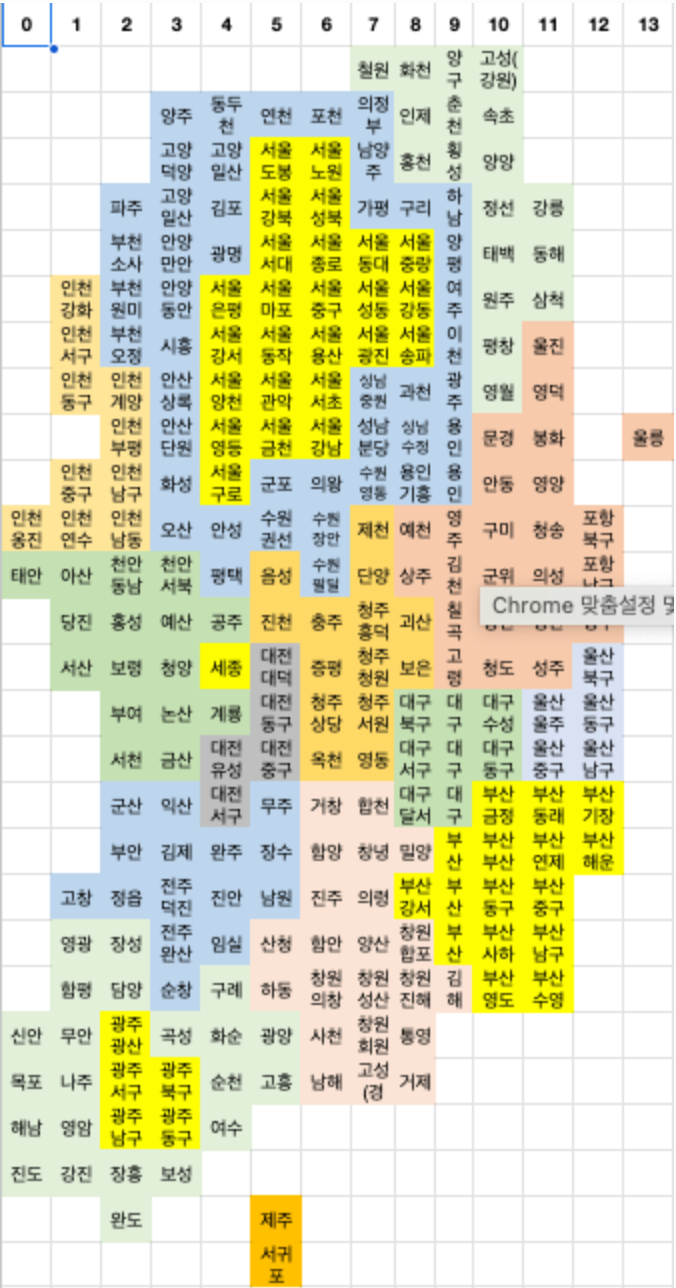

In [186]:
draw_korea = pd.read_excel("../data/07_draw_korea_raw.xlsx" , engine="openpyxl")
draw_korea

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,고양 덕양,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,파주,고양 일산서,김포,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,부천 소사,안양 만안,광명,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN
5,NaN,인천 강화,부천 원미,안양 동안,서울 은평,서울 마포,서울 중구,서울 성동,서울 강동,여주,원주,삼척,NaN,NaN
6,NaN,인천 서구,부천 오정,시흥,서울 강서,서울 동작,서울 용산,서울 광진,서울 송파,이천,평창,울진,NaN,NaN
7,NaN,인천 동구,인천 계양,안산 상록,서울 양천,서울 관악,서울 서초,성남 중원,과천,광주,영월,영덕,NaN,NaN
8,NaN,NaN,인천 부평,안산 단원,서울 영등포,서울 금천,서울 강남,성남 분당,성남 수정,용인 수지,문경,봉화,NaN,울릉
9,NaN,인천 중구,인천 남구,화성,서울 구로,군포,의왕,수원 영통,용인 기흥,용인 처인,안동,영양,NaN,NaN


<a id="지역별-좌표-조회"></a>
### 엑셀에서의 각 지역별 좌표 조회

In [187]:
draw_korea = pd.DataFrame(draw_korea_raw.stack())
draw_korea

0
0  7       철원
   8       화천
   9       양구
   10  고성(강원)
1  3       양주
...       ...
24 2       장흥
   3       보성
25 2       완도
   5       제주
26 5      서귀포

[252 rows x 1 columns]

#### 위의 인덱스 컬럼으로 포함시켜 좌표로 사용

In [188]:
draw_korea.reset_index(inplace=True)
draw_korea

,level_0,level_1,0
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
...,...,...,...
247,24,2,장흥
248,24,3,보성
249,25,2,완도
250,25,5,제주


In [189]:
draw_korea.rename(
    columns = {"level_0": "y", "level_1": "x", 0: "ID"},
    inplace=True
)

draw_korea.head()

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


<a id="지역별-경계선-그리기"></a>
### 지역별 경계선 그리기

#### 경계선 좌표 정의
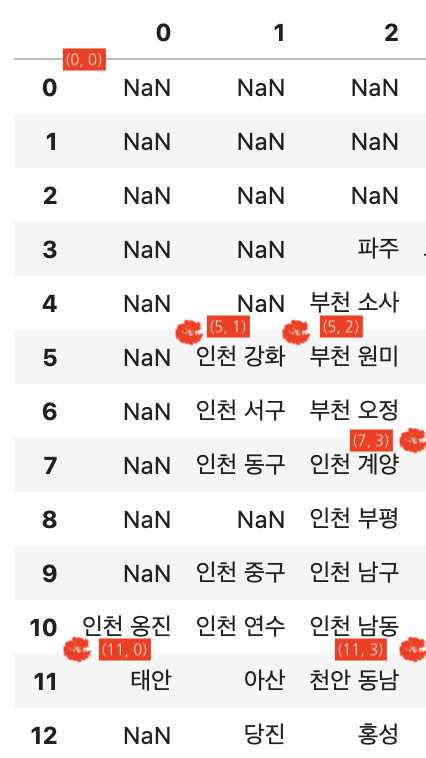

In [190]:
BORDER_LINES = [
    [(5, 1), (5, 2), (7, 2), (7, 3), (11, 3), (11, 0)], # 인천
    [(5, 4), (5, 5), (2, 5), (2, 7), (4, 7), (4, 9), (7, 9), (7, 7), (9, 7), (9, 5), (10, 5), (10, 4), (5, 4)], # 서울
    [(1, 7), (1, 8), (3, 8), (3, 10), (10, 10), (10, 7), (12, 7), (12, 6), (11, 6), (11, 5), (12, 5), (12, 4), (11, 4), (11, 3)], # 경기도
    [(8, 10), (8, 11), (6, 11), (6, 12)], # 강원도
    [(12, 5), (13, 5), (13, 4), (14, 4), (14, 5), (15, 5), (15, 4), (16, 4), (16, 2)], # 충청북도
    [(16, 4), (17, 4), (17, 5), (16, 5), (16, 6), (19, 6), (19, 5), (20, 5), (20, 4), (21, 4), (21, 3), (19, 3), (19, 1)], # 전라북도
    [(13, 5), (13, 6), (16, 6)], 
    [(13, 5), (14, 5)], # 대전시 # 세종시
    [(21, 2), (21, 3), (22, 3), (22, 4), (24, 4), (24, 2), (21, 2)], # 광주
    [(20, 5), (21, 5), (21, 6), (23, 6)], # 전라남도
    [(10, 8), (12, 8), (12, 9), (14, 9), (14, 8), (16, 8), (16, 6)], # 충청북도
    [(14, 9), (14, 11), (14, 12), (13, 12), (13, 13)], # 경상북도
    [(15, 8), (17, 8), (17, 10), (16, 10), (16, 11), (14, 11)], # 대구
    [(17, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10), (21, 10)], # 부산
    [(16, 11), (16, 13)],
    [(27, 5), (27, 6), (25, 6)]
]

#### 차집합으로 draw_korea, pop 의 ID 비교
- 차집합은 교환법칙이 성립하지 않는다.

In [191]:
set(draw_korea["ID"].unique()) - set(pop["ID"].unique())

{'군위', '인천 남구'}

In [192]:
set(pop["ID"].unique()) - set(draw_korea["ID"].unique())

{'대구 군위', '인천 미추홀'}

In [196]:
draw_korea[draw_korea["ID"] == "군위"]["ID"]

118    군위
Name: ID, dtype: object

In [199]:
# 군위 -> 대구 군위
# 인천 남구 -> 인천 미추홀

draw_korea.loc[draw_korea["ID"] == "군위", "ID"] = "대구 군위"
draw_korea.loc[draw_korea["ID"] == "인천 남구", "ID"] = "인천 미추홀"

In [200]:
set(draw_korea["ID"].unique()) - set(pop["ID"].unique())

set()

In [201]:
set(pop["ID"].unique()) - set(draw_korea["ID"].unique())

set()

#### 경계선에 시도 이름 표현

In [202]:
draw_korea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   y       252 non-null    int64 
 1   x       252 non-null    int64 
 2   ID      252 non-null    object
dtypes: int64(2), object(1)
memory usage: 6.0+ KB


In [203]:
def plot_text_simple(draw_korea):
    for idx, row in draw_korea.iterrows():
        if len(row["ID"].split()) == 2: # 인천 중구 -> 인천 줄바꿈 중구로 나타나도록
            dispname = "{}\n{}".format(row["ID"].split()[0], row["ID"].split()[1])
        elif row["ID"][:2] == "고성": # 고성(경남), 고성(강원)
            dispname = "고성"
        else:
            dispname = row["ID"]
            
        # 글자 길이에 따른 글자 크기 변경
        if len(dispname.splitlines()[-1]) >= 3:
               fontsize, linespacing = 9.5, 1.5
        else:
               fontsize, linespacing = 11, 1.2
        
        plt.annotate(
            dispname,
            (row["x"] + 0.5, row["y"] + 0.5),
            weight = "bold",
            fontsize=fontsize,
            ha="center", # 수평 정렬
            va = "center", # 수직 정렬
            linespacing=linespacing
        )

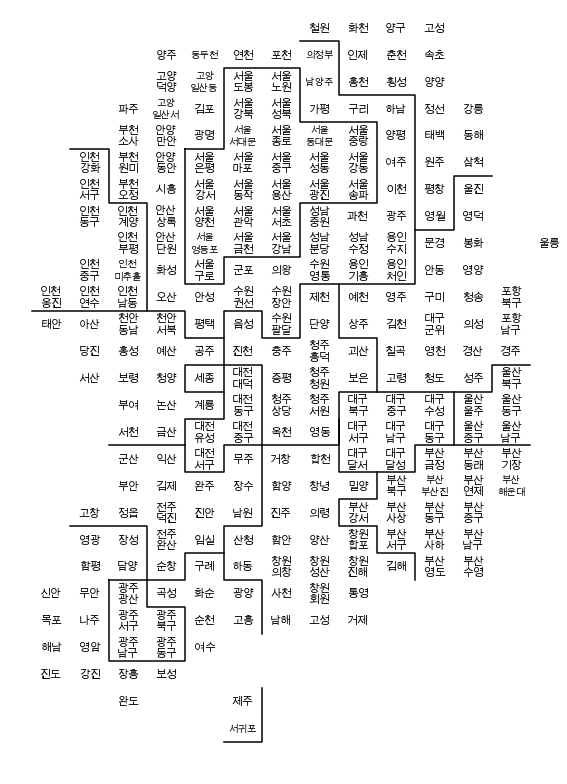

In [204]:
def simpleDraw(draw_korea):
    plt.figure(figsize=(8, 11))
    
    plot_text_simple(draw_korea)
    
    # 경계선 그림
    for path in BORDER_LINES:
        ys, xs = zip(*path) # BORDER_LINES 에서 (y좌표, x좌표) 로 경계선 좌표를 입력했었으므로..
        plt.plot(xs, ys, c="black", lw=1.5)
        
    plt.gca().invert_yaxis()
    plt.axis("off")
    plt.tight_layout()
    plt.show()
    
simpleDraw(draw_korea)

<a id="merge"></a>
### 엑셀에서 얻은 지도 좌표 + 인구현황 데이터

In [205]:
pop = pd.merge(pop, draw_korea, how="left", on=["ID"])
pop.head()

,광역시도,시도,행정구,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID,y,x
0,강원특별자치도,강릉시,소계,19250,42151,53196,103188,105063,208251,0.723739,True,강릉,3,11
1,강원특별자치도,고성군,소계,1956,4779,8962,13909,13234,27143,0.436510,True,고성(강원),0,10
2,강원특별자치도,동해시,소계,7056,16391,21423,44555,43297,87852,0.658731,True,동해,4,11
3,강원특별자치도,삼척시,소계,4991,11343,18419,31726,30604,62330,0.541940,True,삼척,5,11
4,강원특별자치도,속초시,소계,7344,16568,19051,40216,41208,81424,0.770983,True,속초,1,10


<a id="데이터-계산"></a>
### 그림을 그리기 위한 데이터를 계산
- 색상을 만들 때, 최소값을 흰 색
- blockedMap : 인구현황(pop)
- targetData : 그리고 싶은 컬럼

In [215]:
# 최소값을 흰색으로
def get_data_info(targetData, blockedMap):
    whitelabelmin = (
        max(blockedMap[targetData]) - min(blockedMap[targetData])
    ) * 0.25 + min(blockedMap[targetData])
    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])
    
    mapdata = blockedMap.pivot_table(index="y", columns="x", values=targetData)
    
    return mapdata, vmax, vmin, whitelabelmin

In [216]:
# 중간값을 흰색으로
def get_data_info_for_zero_center(targetData, blockedMap):
    whitelabelmin = 5
    tmp_max = max(
        [np.abs(min(blockedMap[targetData])), np.abs(max(blockedMap[targetData]))]
    )
    vmin, vmax = -tmp_max, tmp_max
    
    mapdata = blockedMap.pivot_table(index="y", columns="x", values=targetData)
    return mapdata, vmax, vmin, whitelabelmin

In [222]:
def plot_text(targetData, blockedMap, whitelabelmin):
    for idx, row in blockedMap.iterrows():
        if len(row["ID"].split()) == 2: # 인천 중구 -> 인천 줄바꿈 중구로 나타나도록
            dispname = "{}\n{}".format(row["ID"].split()[0], row["ID"].split()[1])
        elif row["ID"][:2] == "고성": # 고성(경남), 고성(강원)
            dispname = "고성"
        else:
            dispname = row["ID"]
            
        # 글자 길이에 따른 글자 크기 변경
        if len(dispname.splitlines()[-1]) >= 3:
               fontsize, linespacing = 9.5, 1.5
        else:
               fontsize, linespacing = 11, 1.2
        
        annocolor = "white" if np.abs(row[targetData]) > whitelabelmin else "black"
        plt.annotate(
            dispname,
            (row["x"] + 0.5, row["y"] + 0.5),
            weight = "bold",
            fontsize=fontsize,
            color = annocolor,
            ha="center", # 수평 정렬
            va = "center", # 수직 정렬
            linespacing=linespacing
        )

In [230]:
def drawKorea(targetData, blockedMap, cmapname, zeroCenter=False):
    if zeroCenter:
        masked_mapdata, vmax, vmin, whitelabelmin = get_data_info_for_zero_center(targetData, blockedMap)
        
    if not zeroCenter:
        masked_mapdata, vmax, vmin, whitelabelmin = get_data_info(targetData, blockedMap)
    
    plt.figure(figsize=(8, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor="#aaaaaa", linewidth=0.5)
    
    plot_text(targetData, blockedMap, whitelabelmin)
    
    # 경계선 그림
    for path in BORDER_LINES:
        ys, xs = zip(*path) # BORDER_LINES 에서 (y좌표, x좌표) 로 경계선 좌표를 입력했었으므로..
        plt.plot(xs, ys, c="black", lw=1.5)
        
    plt.gca().invert_yaxis()
    plt.axis("off")
    plt.tight_layout()
    cb = plt.colorbar(shrink=0.1, aspect=10)
    cb.set_label(targetData)
    plt.show()

<a id="카르토그램1"></a>
### 인구수 합계 카르토그램

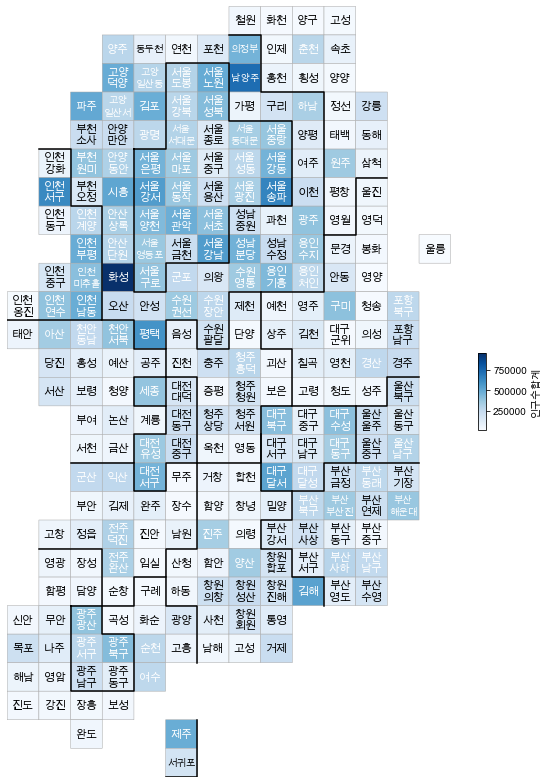

In [231]:
drawKorea("인구수합계", pop, "Blues", False)

<a id="카르토그램2"></a>
### 소멸위기지역 카르토그램

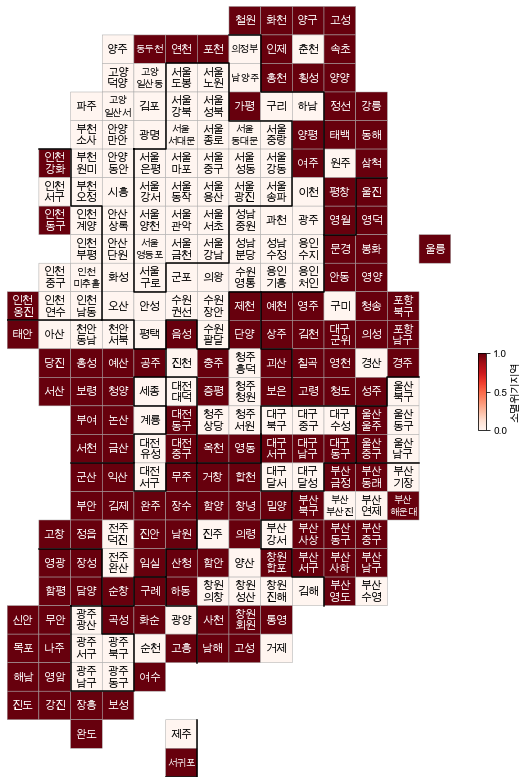

In [234]:
pop["소멸위기지역"] = [1 if con else 0 for con in pop["소멸위기지역"]]
drawKorea("소멸위기지역", pop, "Reds")

<a id="카르토그램3"></a>
### 여성비 카르토그램

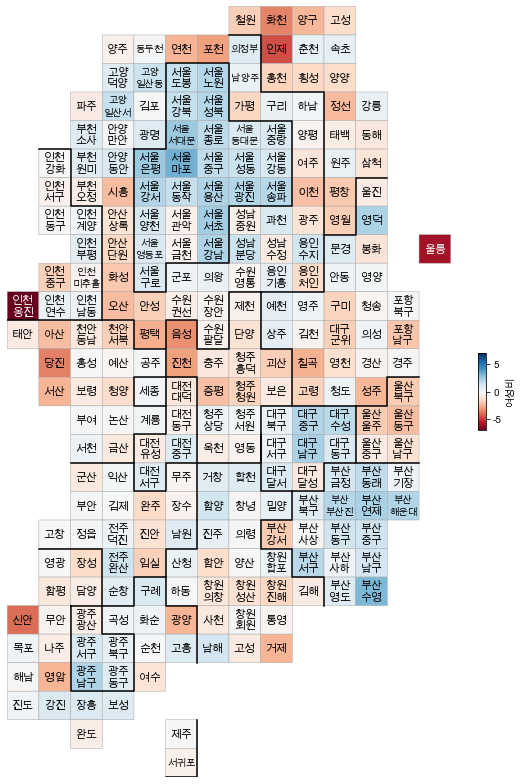

In [236]:
pop["여성비"] = (pop["인구수여자"] / pop["인구수합계"] - 0.5) * 100
drawKorea("여성비", pop, "RdBu", True)

<a id="카르토그램4"></a>
### 2030 여성비 카르토그램

In [237]:
pop.head()

,광역시도,시도,행정구,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID,y,x,여성비
0,강원특별자치도,강릉시,소계,19250,42151,53196,103188,105063,208251,0.723739,1,강릉,3,11,0.450178
1,강원특별자치도,고성군,소계,1956,4779,8962,13909,13234,27143,0.436510,1,고성(강원),0,10,-1.243415
2,강원특별자치도,동해시,소계,7056,16391,21423,44555,43297,87852,0.658731,1,동해,4,11,-0.715977
3,강원특별자치도,삼척시,소계,4991,11343,18419,31726,30604,62330,0.541940,1,삼척,5,11,-0.900048
4,강원특별자치도,속초시,소계,7344,16568,19051,40216,41208,81424,0.770983,1,속초,1,10,0.609157


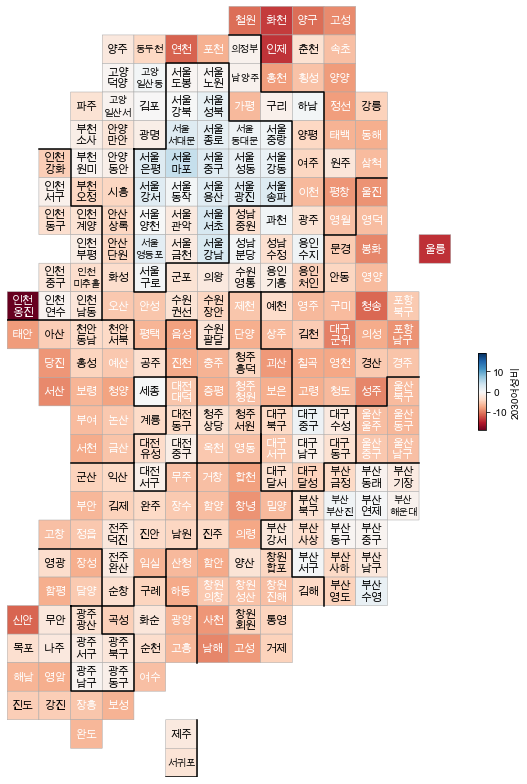

In [240]:
pop["2030여성비"] = (pop["20-39세여자"] / pop["20-39세합계"] - 0.5) * 100
drawKorea("2030여성비", pop, "RdBu", True)

---

<a id="folium"></a>
## 5. Folium 으로 인구현황 시각화

In [241]:
import folium
import json

pop_folium = pop.set_index("ID")
pop_folium.head()

,광역시도,시도,행정구,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,y,x,여성비,2030여성비
ID,,,,,,,,,,,,,,,
강릉,강원특별자치도,강릉시,소계,19250,42151,53196,103188,105063,208251,0.723739,1,3,11,0.450178,-4.330858
고성(강원),강원특별자치도,고성군,소계,1956,4779,8962,13909,13234,27143,0.436510,1,0,10,-1.243415,-9.070935
동해,강원특별자치도,동해시,소계,7056,16391,21423,44555,43297,87852,0.658731,1,4,11,-0.715977,-6.951986
삼척,강원특별자치도,삼척시,소계,4991,11343,18419,31726,30604,62330,0.541940,1,5,11,-0.900048,-5.999295
속초,강원특별자치도,속초시,소계,7344,16568,19051,40216,41208,81424,0.770983,1,1,10,0.609157,-5.673588


[최신 행정구형(shp) 출처](http://www.gisdeveloper.co.kr/?p=2332)<br>
[display_si() 코드 참고](https://herjh0405.tistory.com/156)

In [279]:
import geopandas as gpd
from folium.features import DivIcon

sido = gpd.read_file('../data/ctprvn.shp', encoding='cp949')

In [280]:
sido.crs = "epsg:5179"

In [281]:
sido['center_point'] = sido['geometry'].geometry.centroid
sido['geometry'] = sido['geometry'].to_crs(epsg=4329)
sido['center_point'] = sido['center_point'].to_crs(epsg=4329)
sido['경도'] = sido['center_point'].map(lambda x: x.xy[0][0])
sido['위도'] = sido['center_point'].map(lambda x: x.xy[1][0])

In [282]:
sido.head()

,CTPRVN_CD,CTP_ENG_NM,CTP_KOR_NM,geometry,center_point,경도,위도
0,11,Seoul,서울특별시,"POLYGON ((127.12667 37.46863, 127.12667 37.468...",POINT (126.99181 37.55190),126.991805,37.551903
1,26,Busan,부산광역시,"MULTIPOLYGON (((129.12699 35.15348, 129.12696 ...",POINT (129.06039 35.20163),129.060392,35.201633
2,27,Daegu,대구광역시,"POLYGON ((128.47278 35.83345, 128.47278 35.833...",POINT (128.59916 35.96946),128.599155,35.969464
3,28,Incheon,인천광역시,"MULTIPOLYGON (((125.79162 36.92244, 125.79169 ...",POINT (126.37918 37.58369),126.379176,37.583690
4,29,Gwangju,광주광역시,"POLYGON ((126.76029 35.25870, 126.76105 35.258...",POINT (126.83543 35.15574),126.835435,35.155737


In [283]:
def display_sido(map):
    for idx, row in sido.iterrows():
        folium.Marker(
            location = [row["위도"], row["경도"]],
            icon=DivIcon(
                icon_size=(90,50),
                icon_anchor=(25, 25),
                html=f'''
                    <div style="font-size:10px;font-weight:bold;color:white;background:blue;padding:1px;border-radius:5px;text-align:center;">
                    {row["CTP_KOR_NM"]}
                    </div>
                '''
            )
        ).add_to(map)

<a id="인구수-합계-지도-시각화"></a>
### 인구수합계 지도 시각화

In [286]:
geo_path = "../data/07_skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))

mymap = folium.Map(location=[36.2002, 127.054], zoom_start=7)
mymap.choropleth(
    geo_data=geo_str, 
    data = pop_folium["인구수합계"],
    key_on="feature.id",
    columns=[pop_folium.index, pop_folium["인구수합계"]],
    fill_color = "YlGnBu"
)

display_sido(mymap)

mymap

<a id="소멸위기지역-지도-시각화"></a>
### 소멸위기지역 지도 시각화

In [288]:
mymap = folium.Map(location=[36.2002, 127.054], zoom_start=7)
mymap.choropleth(
    geo_data=geo_str, 
    data = pop_folium["소멸위기지역"],
    key_on="feature.id",
    columns=[pop_folium.index, pop_folium["소멸위기지역"]],
    fill_color = "PuRd"
)

display_sido(mymap)

mymap

---

<a id="데이터-저장"></a>
## 6. 데이터 저장

In [290]:
draw_korea.to_csv("../data/07. draw_korea.csv", encoding="utf-8", sep=",")

---

<a id="사용-함수-예제"></a>
## 사용 함수 예제

<a id="fill-na"></a>
### fillna()

In [184]:
datas = {
    "A": np.random.randint(1, 45, 8),
    "B": np.random.randint(1, 45, 8),
    "C": np.random.randint(1, 45, 8),
}

datas

{'A': array([ 2, 43,  2, 37,  5,  9, 34, 30]),
 'B': array([22, 28, 42, 28,  9,  7,  3,  8]),
 'C': array([35,  6, 20, 32, 12,  9, 21, 28])}

In [185]:
fillna_df = pd.DataFrame(datas)
fillna_df

,A,B,C
0,2,22,35
1,43,28,6
2,2,42,20
3,37,28,32
4,5,9,12
5,9,7,9
6,34,3,21
7,30,8,28


In [186]:
fillna_df.loc[2:4, ["A"]] = np.nan
fillna_df.loc[3:5, ["B"]] = np.nan
fillna_df.loc[4:7, ["C"]] = np.nan
fillna_df

,A,B,C
0,2.0,22.0,35.0
1,43.0,28.0,6.0
2,NaN,42.0,20.0
3,NaN,NaN,32.0
4,NaN,NaN,NaN
5,9.0,NaN,NaN
6,34.0,3.0,NaN
7,30.0,8.0,NaN


####  method
```
method : {'backfill', 'bfill', 'pad', 'ffill', None}, default None
    Method to use for filling holes in reindexed Series
    pad / ffill: propagate last valid observation forward to next valid
    backfill / bfill: use next valid observation to fill gap.
```

In [187]:
fillna_df.fillna(method="pad")

,A,B,C
0,2.0,22.0,35.0
1,43.0,28.0,6.0
2,43.0,42.0,20.0
3,43.0,42.0,32.0
4,43.0,42.0,32.0
5,9.0,42.0,32.0
6,34.0,3.0,32.0
7,30.0,8.0,32.0


In [188]:
fillna_df.fillna(method="backfill")

,A,B,C
0,2.0,22.0,35.0
1,43.0,28.0,6.0
2,9.0,42.0,20.0
3,9.0,3.0,32.0
4,9.0,3.0,NaN
5,9.0,3.0,NaN
6,34.0,3.0,NaN
7,30.0,8.0,NaN


In [189]:
fillna_df.fillna(method="backfill", axis=1)

,A,B,C
0,2.0,22.0,35.0
1,43.0,28.0,6.0
2,42.0,42.0,20.0
3,32.0,32.0,32.0
4,NaN,NaN,NaN
5,9.0,NaN,NaN
6,34.0,3.0,NaN
7,30.0,8.0,NaN
